# Análisis de datos financieros

En finanzas, la creación de un portafolio de inversiones que se adecúe a las necesidades y perfil de una persona es de gran importancia, no sólo normativa si no para que duerma un poco más tranquila por las noches.

Para eso, es necesario revisar muchas variables, desde precios de activos, hasta cotizaciones de monedas o variables macroeconómicas. En este primer práctico vamos a entender un poco más sobre el dolar y sus diferentes cotizaciones, cómo podemos hacer un proxy de la misma para invertir en la bolsa y qué oportunidades de inversión podemos encontrar en base a eso.

Empecemos con la obtención de datos, a partir de la web de RAVA (hay un backup en el repo).

In [18]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import optimize
%matplotlib inline
import sys
from io import StringIO

import seaborn as sns
import pylab 
import scipy.stats as stats
# https://stackoverflow.com/questions/48924103/importerror-no-module-named-plotly
import plotly
import plotly.graph_objs as go
# SOLO STOCKS QUE COMENZARON EN 2016
bonds = ['AO20', 'AO20D', 'AA37', 'AA37D', 'AY24', 'AY24D',
          'DICA', 'DICAD', 'AA25', 'AA25D', 'CO26', 'CO26D',
          'A2E2', 'A2E2D']
# Para más información del bono
# https://www.rava.com/empresas/perfil.php?e={} suplantar e={} por el bono -> e=AO20

In [2]:
#for bond in bonds:
#    url = 'http://www.ravabursatil.com/v2/empresas/precioshistoricos.php?e={}&csv=1'.format(bond)
#    req = requests.get(url, allow_redirects=True)
#    df = pd.read_csv(StringIO(req.content.decode("utf-8")))
#    name = '{}.csv'.format(bond)
    # grabar en la carpeta base
#    df.to_csv(name)

# Cómo seguimos?

Un bono es una especie de préstamo que pide un ente (nación, provincia, ciudad, compañía) con el objetivo de mejorar algo en su infraestructura o funcionamiento, con promesa de pagos de intereses en el camino a su vencimiento.

Para más información, se puede visitar [Este link (con chivo)](https://www.invera.com.ar) o, para más información aún, se puede usar [Investopedia](https://www.investopedia.com) para cualquier duda con respecto al mundo de las inversiones.

Las cotizaciones de los mismos están en dólares y pesos, para algunos en particular. Luego, pasaremos a revisar cotizaciones históricas del dólar.

In [3]:
df = pd.read_csv('dolarbna.csv')
df.head()

,Unnamed: 0,created,updated,currency,exchange_rate,exchange_date,exchange_rate_buy
0,0,2019-04-01 16:30:24,2019-04-01 19:30:24,USD_BN,43.7,2019-04-01 19:30:25,41.7
1,1,2019-04-01 16:00:26,2019-04-01 19:00:26,USD_BN,43.7,2019-04-01 19:00:27,41.7
2,2,2019-04-01 15:30:25,2019-04-01 18:30:25,USD_BN,43.7,2019-04-01 18:30:25,41.7
3,3,2019-04-01 15:00:25,2019-04-01 18:00:25,USD_BN,43.7,2019-04-01 18:00:27,41.7
4,4,2019-04-01 14:30:24,2019-04-01 17:30:24,USD_BN,43.7,2019-04-01 17:30:26,41.7


Como primera consigna, la cotización del dólar del BNA abre a las 10 AM y cierra a las 15 PM, podemos armar un dataset que, para cada día, tenga la cotización de cierre del precio del dólar. La columna de venta (la más vista por la gente) es la de 'exchange_rate'.

### Resolución
Agrupar por día la columna exchange_date y dejar aquella con hora más alta en el día

In [4]:
# Chequeamos los tipos de objetos que pandas asigno en cada una de las columnas
df.dtypes

Unnamed: 0             int64
created               object
updated               object
currency              object
exchange_rate        float64
exchange_date         object
exchange_rate_buy    float64
dtype: object

In [5]:
# Como vemos que created, updated y exchange_date no los tomo como fechas, los transformamos aunque solo necesitemos el último
df['created'] = pd.to_datetime(df['created'])
df['updated'] = pd.to_datetime(df['updated'])
df['exchange_date'] = pd.to_datetime(df['exchange_date'])
df.dtypes

Unnamed: 0                    int64
created              datetime64[ns]
updated              datetime64[ns]
currency                     object
exchange_rate               float64
exchange_date        datetime64[ns]
exchange_rate_buy           float64
dtype: object

In [47]:
# Agrupar por fechas y ordenar de más antigua a más nueva
#df_exchange_close = df.resample('D', on='exchange_date').max().sort_index(ascending=True)
df_aux = df
df_aux['exchange_date_aux']= df['exchange_date']
df_exchange_close = df_aux.set_index('exchange_date').groupby(pd.Grouper(freq='D')).max()
# TODO chequear que me toma el valor del horario del día más alto en vez de tomar el valor más alto de cada columna por día
df_exchange_close.exchange_rate

exchange_date
2018-03-26    20.45
2018-03-27    20.45
2018-03-28    20.40
2018-03-29      NaN
2018-03-30      NaN
2018-03-31      NaN
2018-04-01      NaN
2018-04-02      NaN
2018-04-03    20.40
2018-04-04    20.45
2018-04-05    20.45
2018-04-06    20.45
2018-04-07      NaN
2018-04-08      NaN
2018-04-09    20.45
2018-04-10    20.45
2018-04-11    20.40
2018-04-12    20.45
2018-04-13    20.45
2018-04-14      NaN
2018-04-15      NaN
2018-04-16    20.45
2018-04-17    20.45
2018-04-18    20.45
2018-04-19    20.40
2018-04-20    20.45
2018-04-21      NaN
2018-04-22      NaN
2018-04-23    20.50
2018-04-24    20.50
              ...  
2019-03-03      NaN
2019-03-04      NaN
2019-03-05      NaN
2019-03-06    41.60
2019-03-07    43.50
2019-03-08    42.20
2019-03-09      NaN
2019-03-10      NaN
2019-03-11    42.30
2019-03-12    42.50
2019-03-13    42.20
2019-03-14    41.80
2019-03-15    41.00
2019-03-16      NaN
2019-03-17      NaN
2019-03-18    41.00
2019-03-19    41.50
2019-03-20    41.80
2019-0

### Punto 2

Vamos a cargar ahora las cotizaciones de los bonos y explorar un poquito... Revisemos el dataset del Bonar 2024 (AY24).

In [7]:
ay24 = pd.read_csv('AY24.csv')
ay24.head()

,Unnamed: 0,fecha,apertura,maximo,minimo,cierre,volumen,openint
0,0,2014-05-13,861.00000,880.00,861.0,880.00000,2756877,0
1,1,2014-05-14,883.00000,915.00,882.0,907.00000,23301196,0
2,2,2014-05-15,910.04999,927.45,899.5,922.00000,22532616,0
3,3,2014-05-16,925.00000,935.00,923.0,934.40002,32249204,0
4,4,2014-05-19,937.00000,974.00,936.0,970.00000,18602860,0


Empecemos a limpiar un poco los datasets.

- Tenemos algunas columnas que no sirven para nada, como 'Unnamed'.
- Es realmente inservible 'openint'? Sin saber qué significa, podemos decidir si nos va a servir para algo?
- Al igual que con el dólar, necesitamos un dataset que, para cada día tenga el último precio de negociación, indicado por la columna 'cierre'.
- Podemos plotear este dataset que creamos? Podemos hacer un muy lindo plot usando https://plot.ly/python/candlestick-charts/

## Resolución

In [8]:
ay24.describe()

,Unnamed: 0,apertura,maximo,minimo,cierre,volumen,openint
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1.215000e+03,1215.0
mean,607.000000,1984.457238,1997.425974,1970.441802,1983.644178,1.636131e+07,0.0
std,350.884596,844.029247,852.453041,836.862977,844.035070,1.171095e+07,0.0
min,0.000000,861.000000,880.000000,861.000000,880.000000,7.551180e+05,0.0
25%,303.500000,1313.424990,1323.000000,1292.750000,1303.799990,7.851861e+06,0.0
50%,607.000000,1821.000000,1825.000000,1817.500000,1821.000000,1.400956e+07,0.0
75%,910.500000,2247.500000,2256.000000,2238.125000,2251.805055,2.203830e+07,0.0
max,1214.000000,4225.000000,4300.000000,4195.500000,4225.000000,1.278339e+08,0.0


In [9]:
ay24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 8 columns):
Unnamed: 0    1215 non-null int64
fecha         1215 non-null object
apertura      1215 non-null float64
maximo        1215 non-null float64
minimo        1215 non-null float64
cierre        1215 non-null float64
volumen       1215 non-null int64
openint       1215 non-null int64
dtypes: float64(4), int64(3), object(1)
memory usage: 76.0+ KB


Observando esto podemos detectar que 'Unnamed: 0' es una columna de index porque va del 0 a 1214 habiendo 125 filas y todas distintas, posiblemente sean ids. Por otro lado, openint indica cuantas posiciones quedaron abiertas. En este caso, no tiene valores significativos para este conjunto de datos ya que no varía. Sin embargo, no sería correcto eliminarlo ya que puede ser utilizado para realizar algún análisis pertinente.

In [10]:
# Hacemos la columna 'Unnamed: 0' más amigable convirtiendola a solo 'unnamed' y la colocamos como index
df_ay24 = ay24.rename(columns={'Unnamed: 0': 'unnamed'})
df_ay24.set_index('unnamed')

,fecha,apertura,maximo,minimo,cierre,volumen,openint
unnamed,,,,,,,
0,2014-05-13,861.00000,880.000,861.0,880.00000,2756877,0
1,2014-05-14,883.00000,915.000,882.0,907.00000,23301196,0
2,2014-05-15,910.04999,927.450,899.5,922.00000,22532616,0
3,2014-05-16,925.00000,935.000,923.0,934.40002,32249204,0
4,2014-05-19,937.00000,974.000,936.0,970.00000,18602860,0
5,2014-05-20,985.00000,988.000,970.0,980.00000,21340664,0
6,2014-05-21,981.00000,984.000,960.0,978.00000,18218768,0
7,2014-05-22,977.00000,978.000,969.0,970.00000,14958550,0
8,2014-05-23,970.00000,973.000,960.0,973.00000,5303922,0


In [11]:
# chequeamos que todas las fechas son únicas
df_ay24[df_ay24.duplicated(subset='fecha', keep='first')]

,unnamed,fecha,apertura,maximo,minimo,cierre,volumen,openint


In [12]:
# Creamos un dataframe con fecha y cierre unicamente
df_ay24_cierre = df_ay24[['fecha', 'cierre']]
df_ay24_cierre.head()

,fecha,cierre
0,2014-05-13,880.00000
1,2014-05-14,907.00000
2,2014-05-15,922.00000
3,2014-05-16,934.40002
4,2014-05-19,970.00000


In [13]:
df_ay24_cierre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 2 columns):
fecha     1215 non-null object
cierre    1215 non-null float64
dtypes: float64(1), object(1)
memory usage: 19.1+ KB


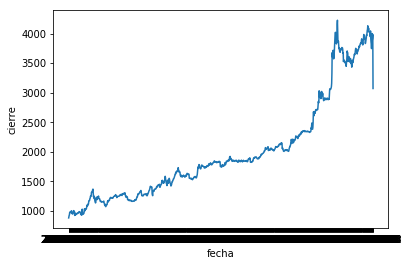

In [14]:
sns.lineplot(x="fecha", y="cierre", data=df_ay24_cierre)

También vamos a graficar basándonos en los valores de apertura, mínimo, máximo y cierre

In [19]:
plotly.offline.init_notebook_mode(connected=True)

trace = go.Candlestick(x=ay24['fecha'],
                open=ay24['apertura'],
                high=ay24['maximo'],
                low=ay24['minimo'],
                close=ay24['cierre'])
data = [trace]

plotly.offline.iplot(data)

Es posible sacar alguna estadística útil para este dataset? Desde el ploteo no lo parece...
Lo importante en finanzas es ver cuánto varía el precio de un activo desde un cierre hasta el próximo, para eso existe el muy útil método pct_change().

## Resolución

In [20]:
# calculo del porcentaje de variación diaria: hace var=[(cierre actual-cierre anterior)/cierre anterior]
var_diaria = df_ay24['cierre'].pct_change()
var_diaria.head()

0         NaN
1    0.030682
2    0.016538
3    0.013449
4    0.038099
Name: cierre, dtype: float64

Parece que va a ser más sencillo revisar algo en este espacio:

- Veamos estadísticas básicas (media, desviación estándar, moda).
- Una afirmación que se suele hacer con los retornos diarios de bonos y acciones, es que se asemejan bastante a una distribución normal. Es así en este caso?


In [21]:
var_diaria.mean()

0.0011333087086906164

In [22]:
var_diaria.std() 

0.01413108747187978

No calculamos la moda porque son datos continuos

Como la desviación estándard es más alta que la media la dispersión es muy amplia. Vamos a comprobarlo con histogramas.

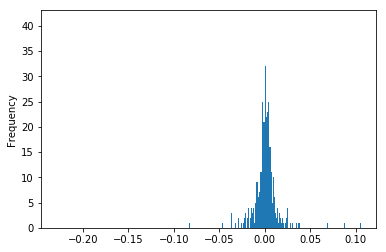

In [23]:
var_diaria.plot.hist(bins=1000)

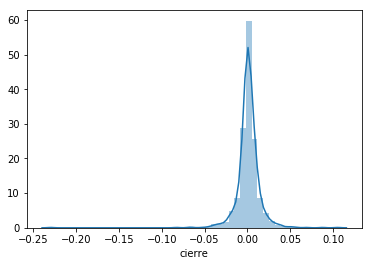

In [24]:
sns.distplot(var_diaria.dropna())

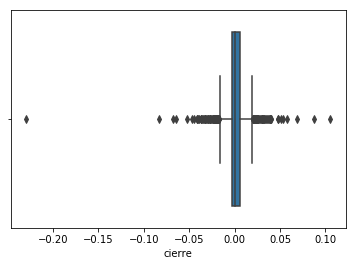

In [25]:
sns.boxplot(var_diaria.dropna())

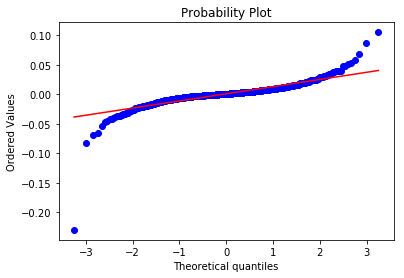

In [26]:
stats.probplot(var_diaria.dropna(), dist="norm", plot=pylab)
pylab.show()

In [27]:
stats.kstest(var_diaria.dropna(), 'norm')

KstestResult(statistic=0.4777389730140299, pvalue=3.5748039192276587e-255)

Por lo tanto rechazamos la hipótesis nula de normalidad ya que el pvalue es 0 o aproximado a 0

Bueno, ahora que nos acomodamos un poco con los datos, vamos a leer el dataset de precios en dólares del AY24, cuyo ticker (abreviación) es AY24D y apliquemos lo mismo que hicimos antes.

Vamos a inventarnos una cotización del dólar "nuestra", dividamos el 